# TODO:
- Remove PSP electron count rate scaling factor (or give as an option?)
- Define data paths
- Channel selection!
- viewing selection!
- SOLO/EPT: [L3](https://github.com/jgieseler/solo-epd-loader?tab=readme-ov-file#example-5---ept-level-3-data) vs. L2 corr.?
- BepiColombo: use public data!
- SOHO/ERNE e?
- STEREO:
    - LET --> leave out for now
    - Behind?
- PSP:
    - EPIHI/LETx?
    - EPILO p?

In [1]:
from multi_sc import Event
import datetime as dt

In [2]:
# initialize Event object
E = Event()

In [3]:
instruments = E.instrument_selection()

GridspecLayout(children=(HTML(value='<b>Electrons:</b>', layout=Layout(grid_area='widget001')), HTML(value='<b…

In [4]:
# define period for data loading; understand most formats
startdate = dt.datetime(2023, 5, 9, 12, 0)
enddate = "2023/05/10 22:00:00"

In [5]:
# load data based on selection
E.load_data(startdate, enddate, instruments)

loading wind/3dp e omni

loading wind/3dp p omni

loading stereo/het
loading stereo/sept e
loading stereo/sept p
loading soho/ephin
loading soho/erne


loading PSP/EPIHI-HET data
loading PSP/EPILO PE data
loading solo/ept e & p
loading solo/het e & p


In [6]:
## print energy channels based on spacecraft and particles selection
# Event.print_energy_channels()

## define energy channels
# psp_het = 5
# solo_ept = 3
# Event.select_channels(selection)

calc_av_en_flux_PSP_EPIHI e 1 MeV
calc_av_en_flux_PSP_EPIHI p
calc_av_en_flux_PSP_EPILO e 100 keV
correcting solo/ept e


  0%|          | 0/288 [00:00<?, ?it/s]

calc_av_en_flux_HET e
calc_av_en_flux_HET p


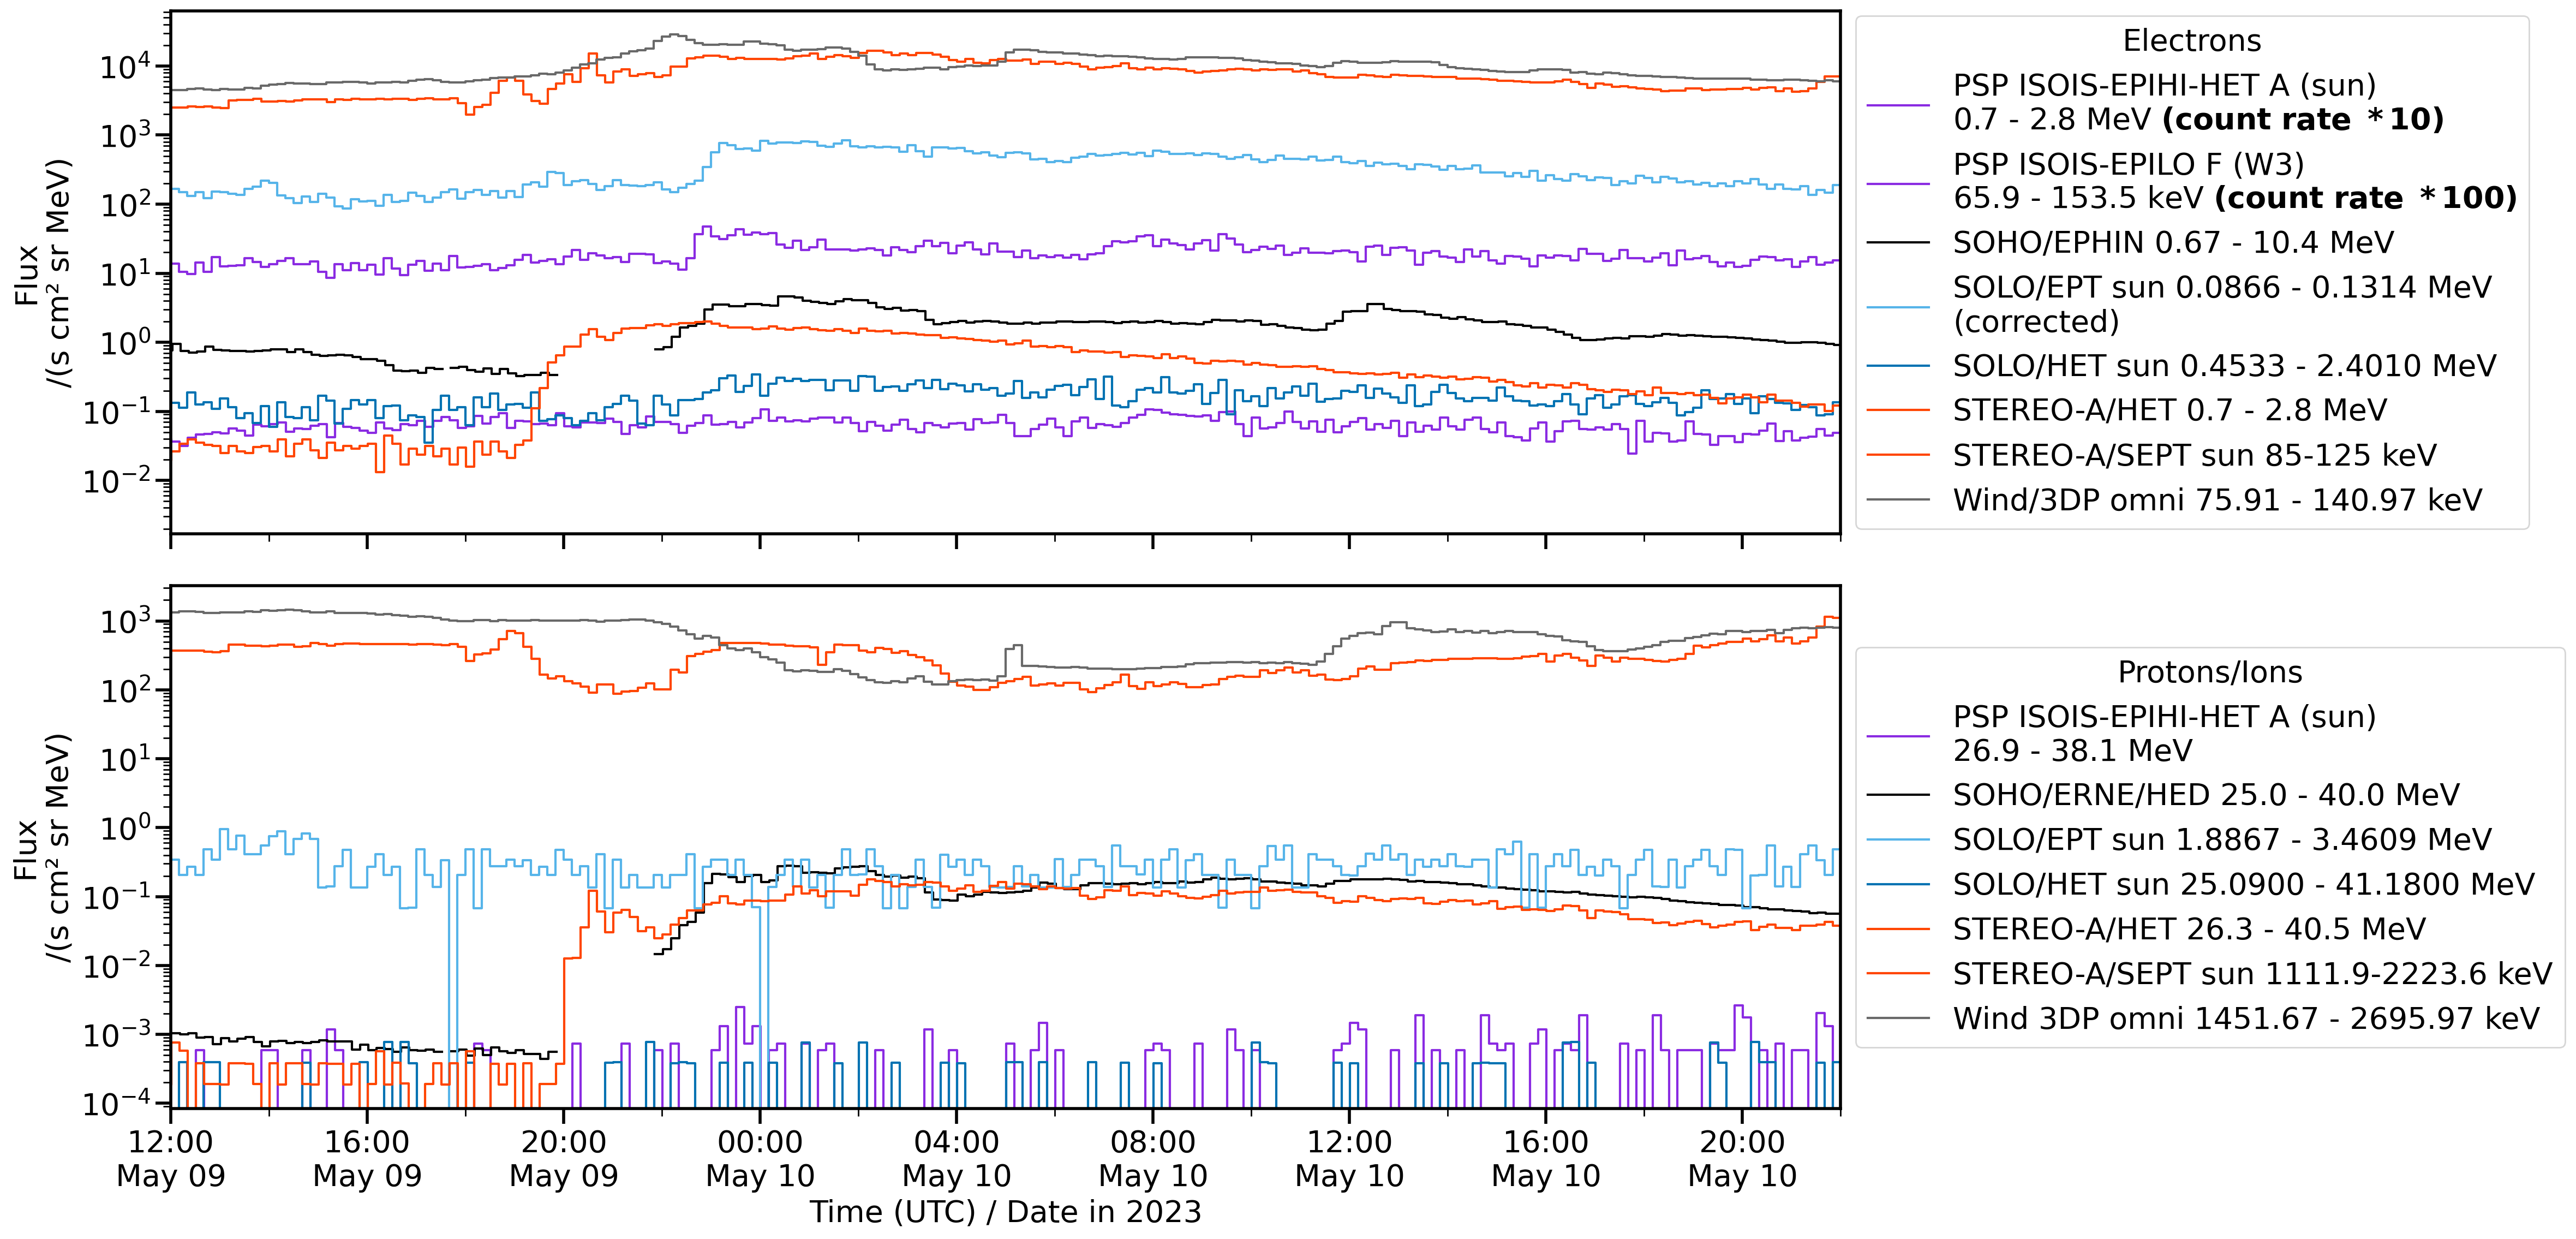

In [7]:
# plot loaded data. optionally adjust time of plot.
fig, axes = E.plot(averaging='10min', dict_plot_instruments=instruments)

calc_av_en_flux_PSP_EPIHI e 1 MeV
calc_av_en_flux_PSP_EPIHI p
calc_av_en_flux_PSP_EPILO e 100 keV
correcting solo/ept e


  0%|          | 0/2880 [00:00<?, ?it/s]

calc_av_en_flux_HET e
calc_av_en_flux_HET p


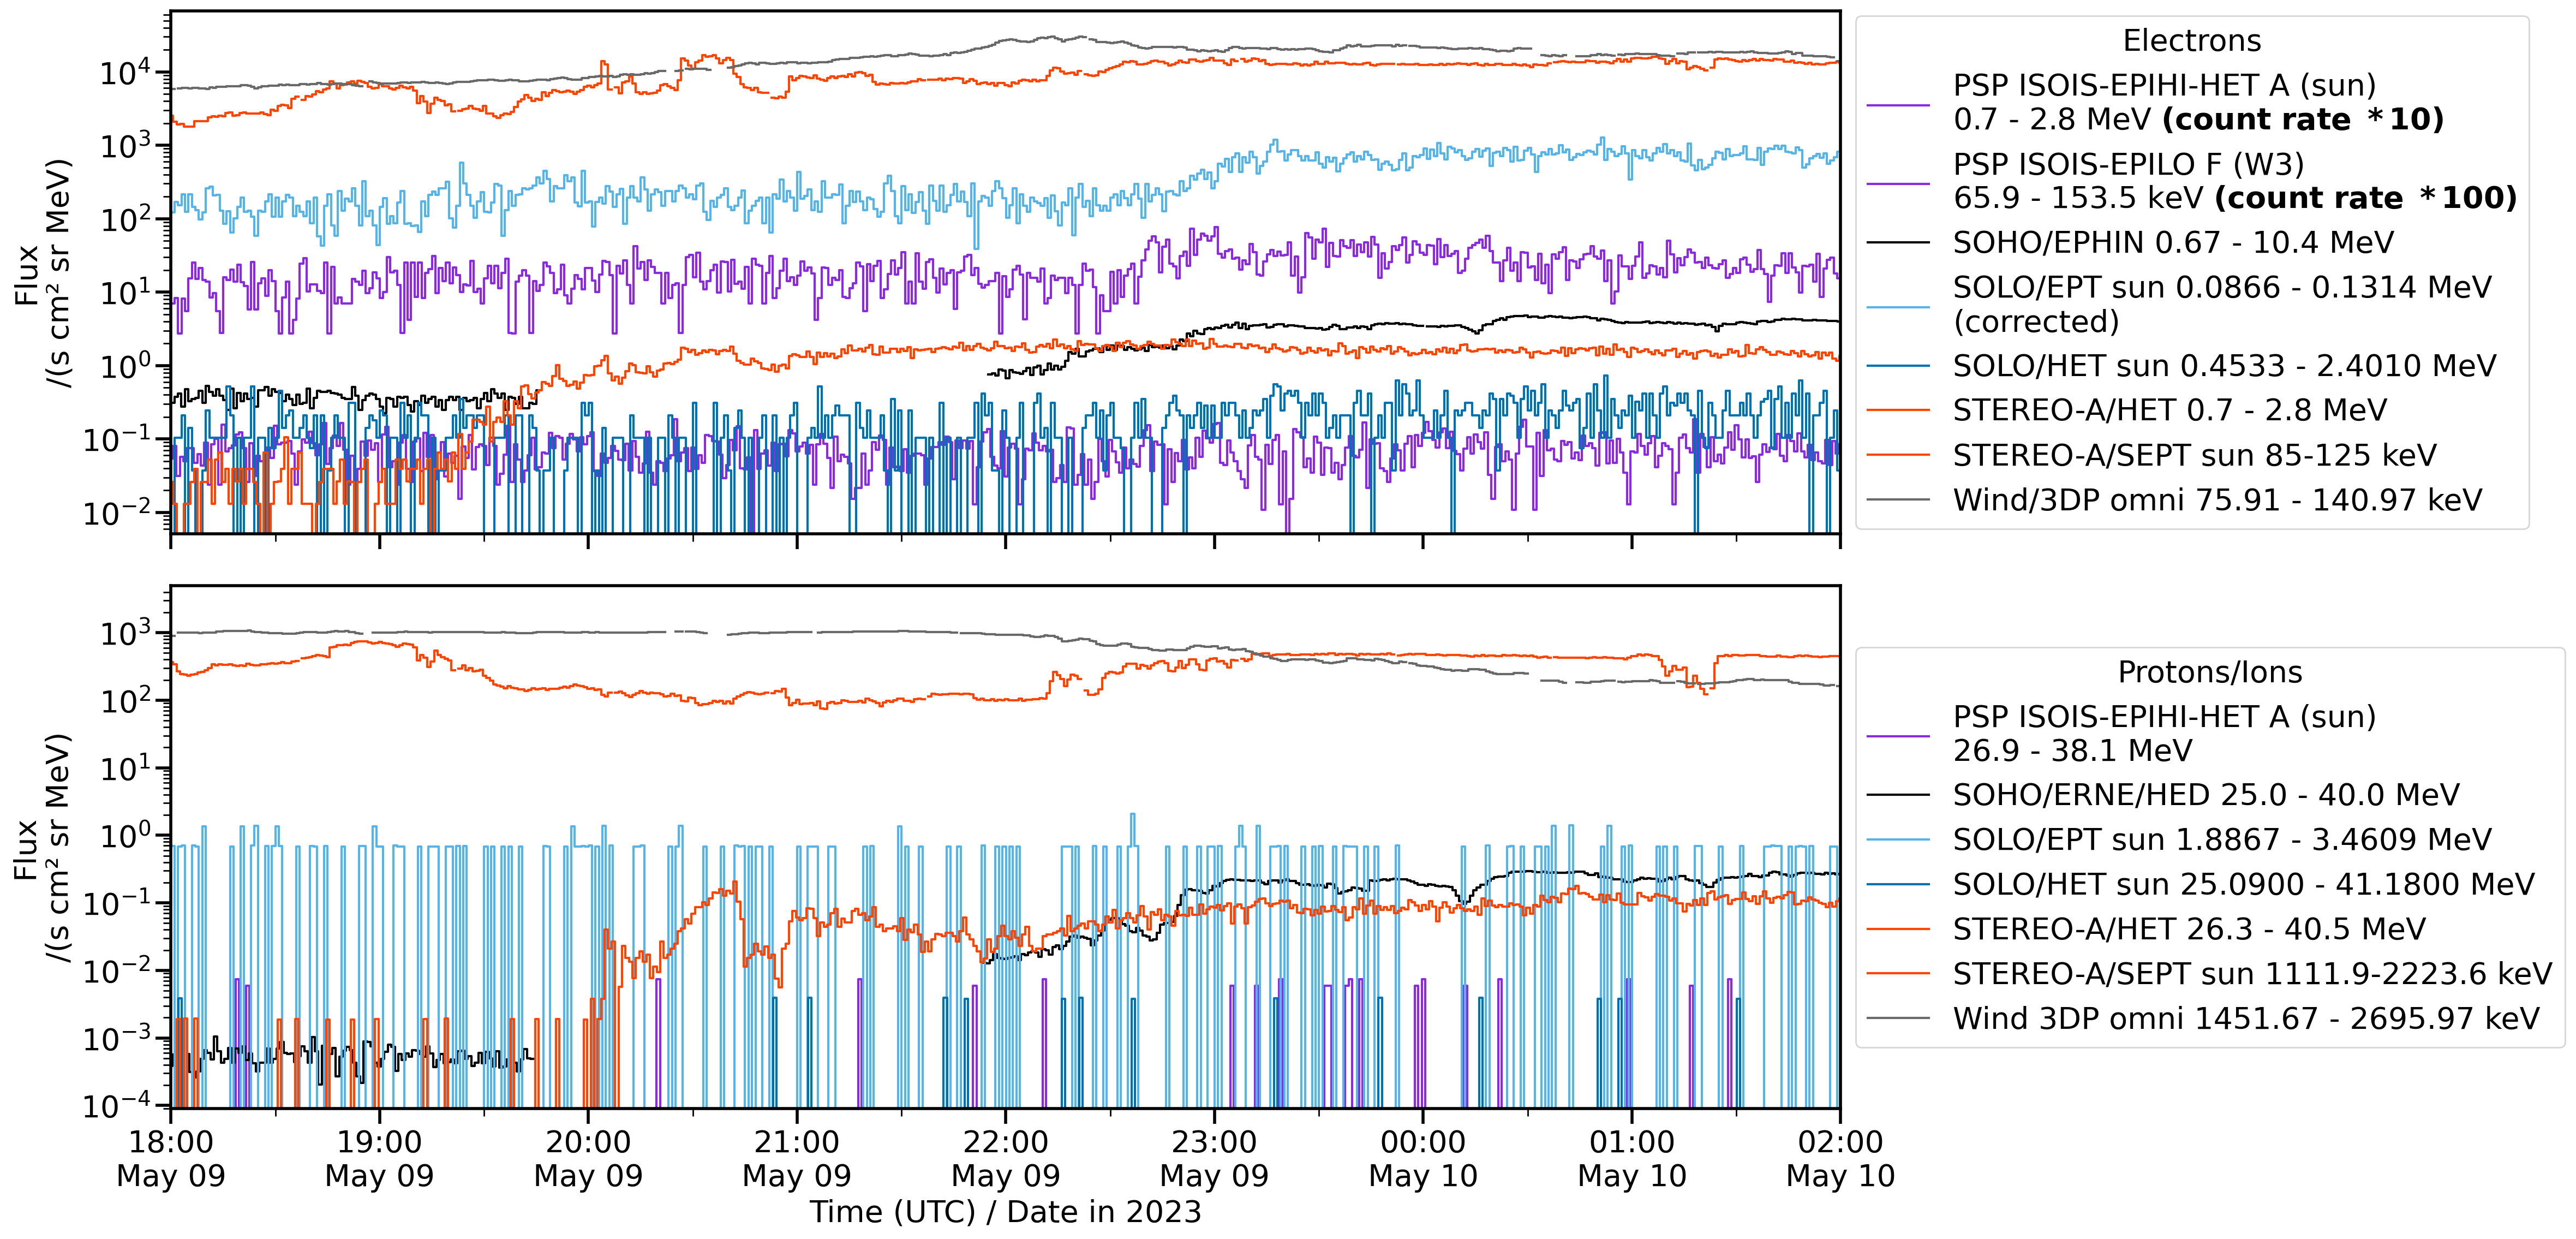

In [8]:
# adjust plot range, updated instruments to plot from widget above:
fig, axes = E.plot(averaging='1min', plot_range=[dt.datetime(2023, 5, 9, 18, 0), dt.datetime(2023, 5, 10, 2, 0)], dict_plot_instruments=instruments)

---

## Edit the figure
For example, at a vertical line at a given datetime

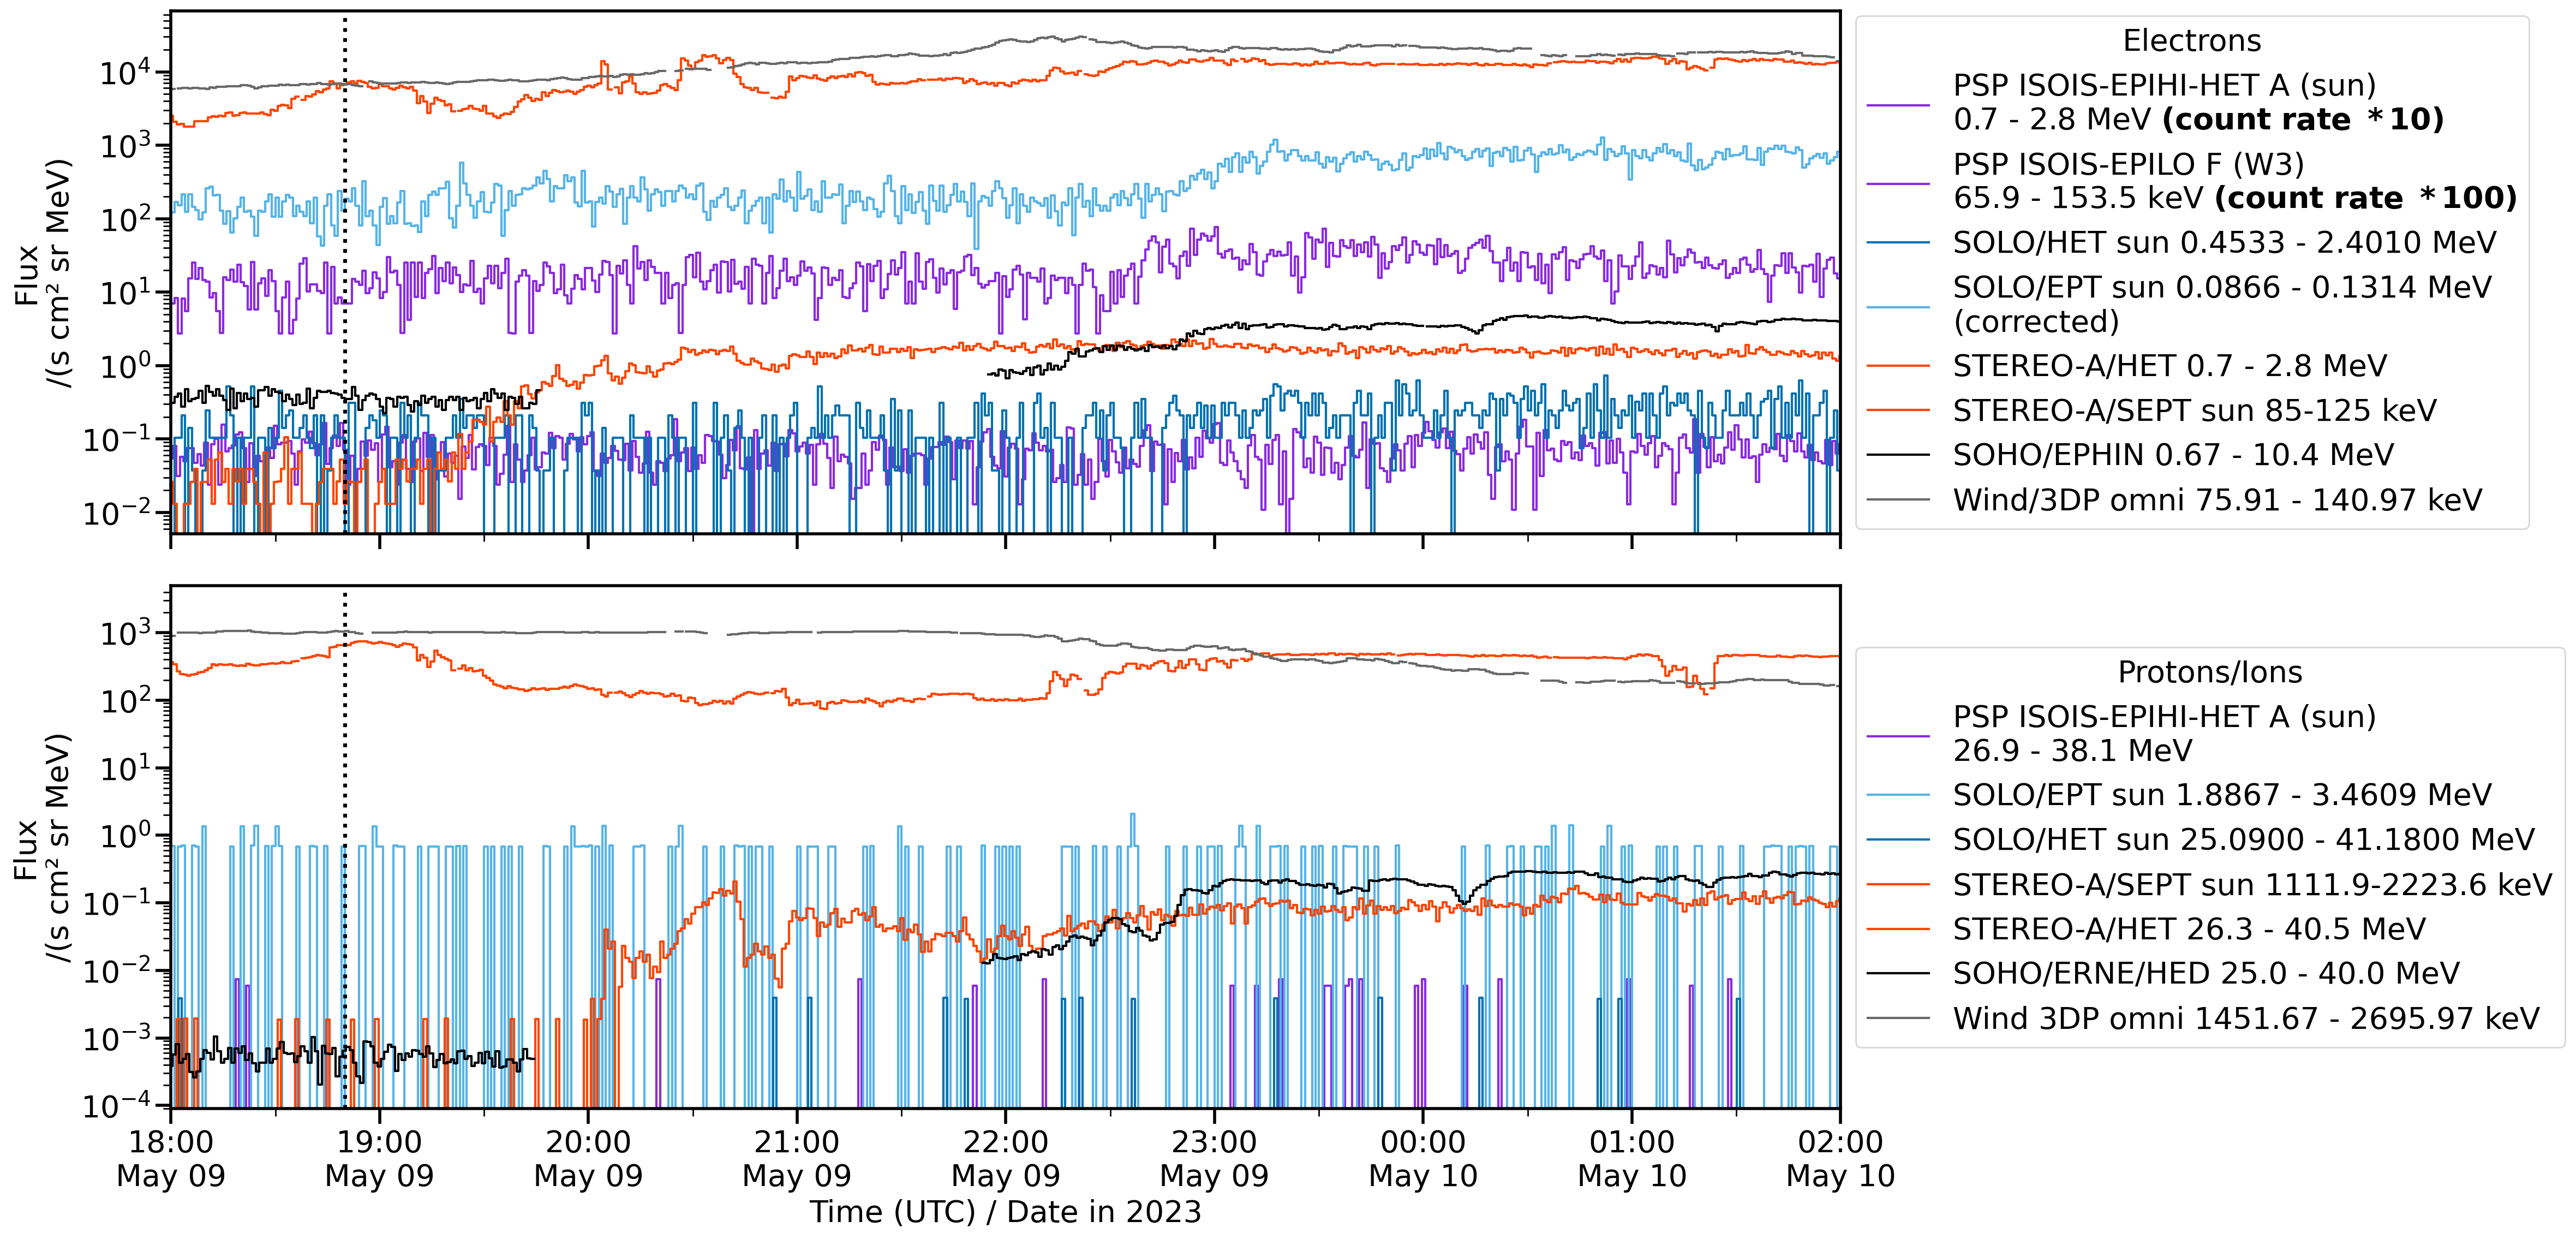

In [11]:
for ax in axes:
    ax.axvline(dt.datetime(2023, 5, 9, 18, 50), lw=2.5, ls=':', color='black')

# show updated figure
fig

## Old loading for comparison

loading wind/3dp e omni

loading stereo/het
loading stereo/sept e
loading soho/ephin
loading soho/erne


loading PSP/EPIHI-HET data
loading PSP/EPILO PE data
loading solo/ept e & p
loading solo/het e & p
loading Bepi/SIXS
correcting solo/ept e


  0%|          | 0/960 [00:00<?, ?it/s]

calc_av_en_flux_HET e
calc_av_en_flux_HET p
calc_av_en_flux_PSP_EPIHI e 1 MeV
calc_av_en_flux_PSP_EPIHI p
calc_av_en_flux_PSP_EPILO e 100 keV


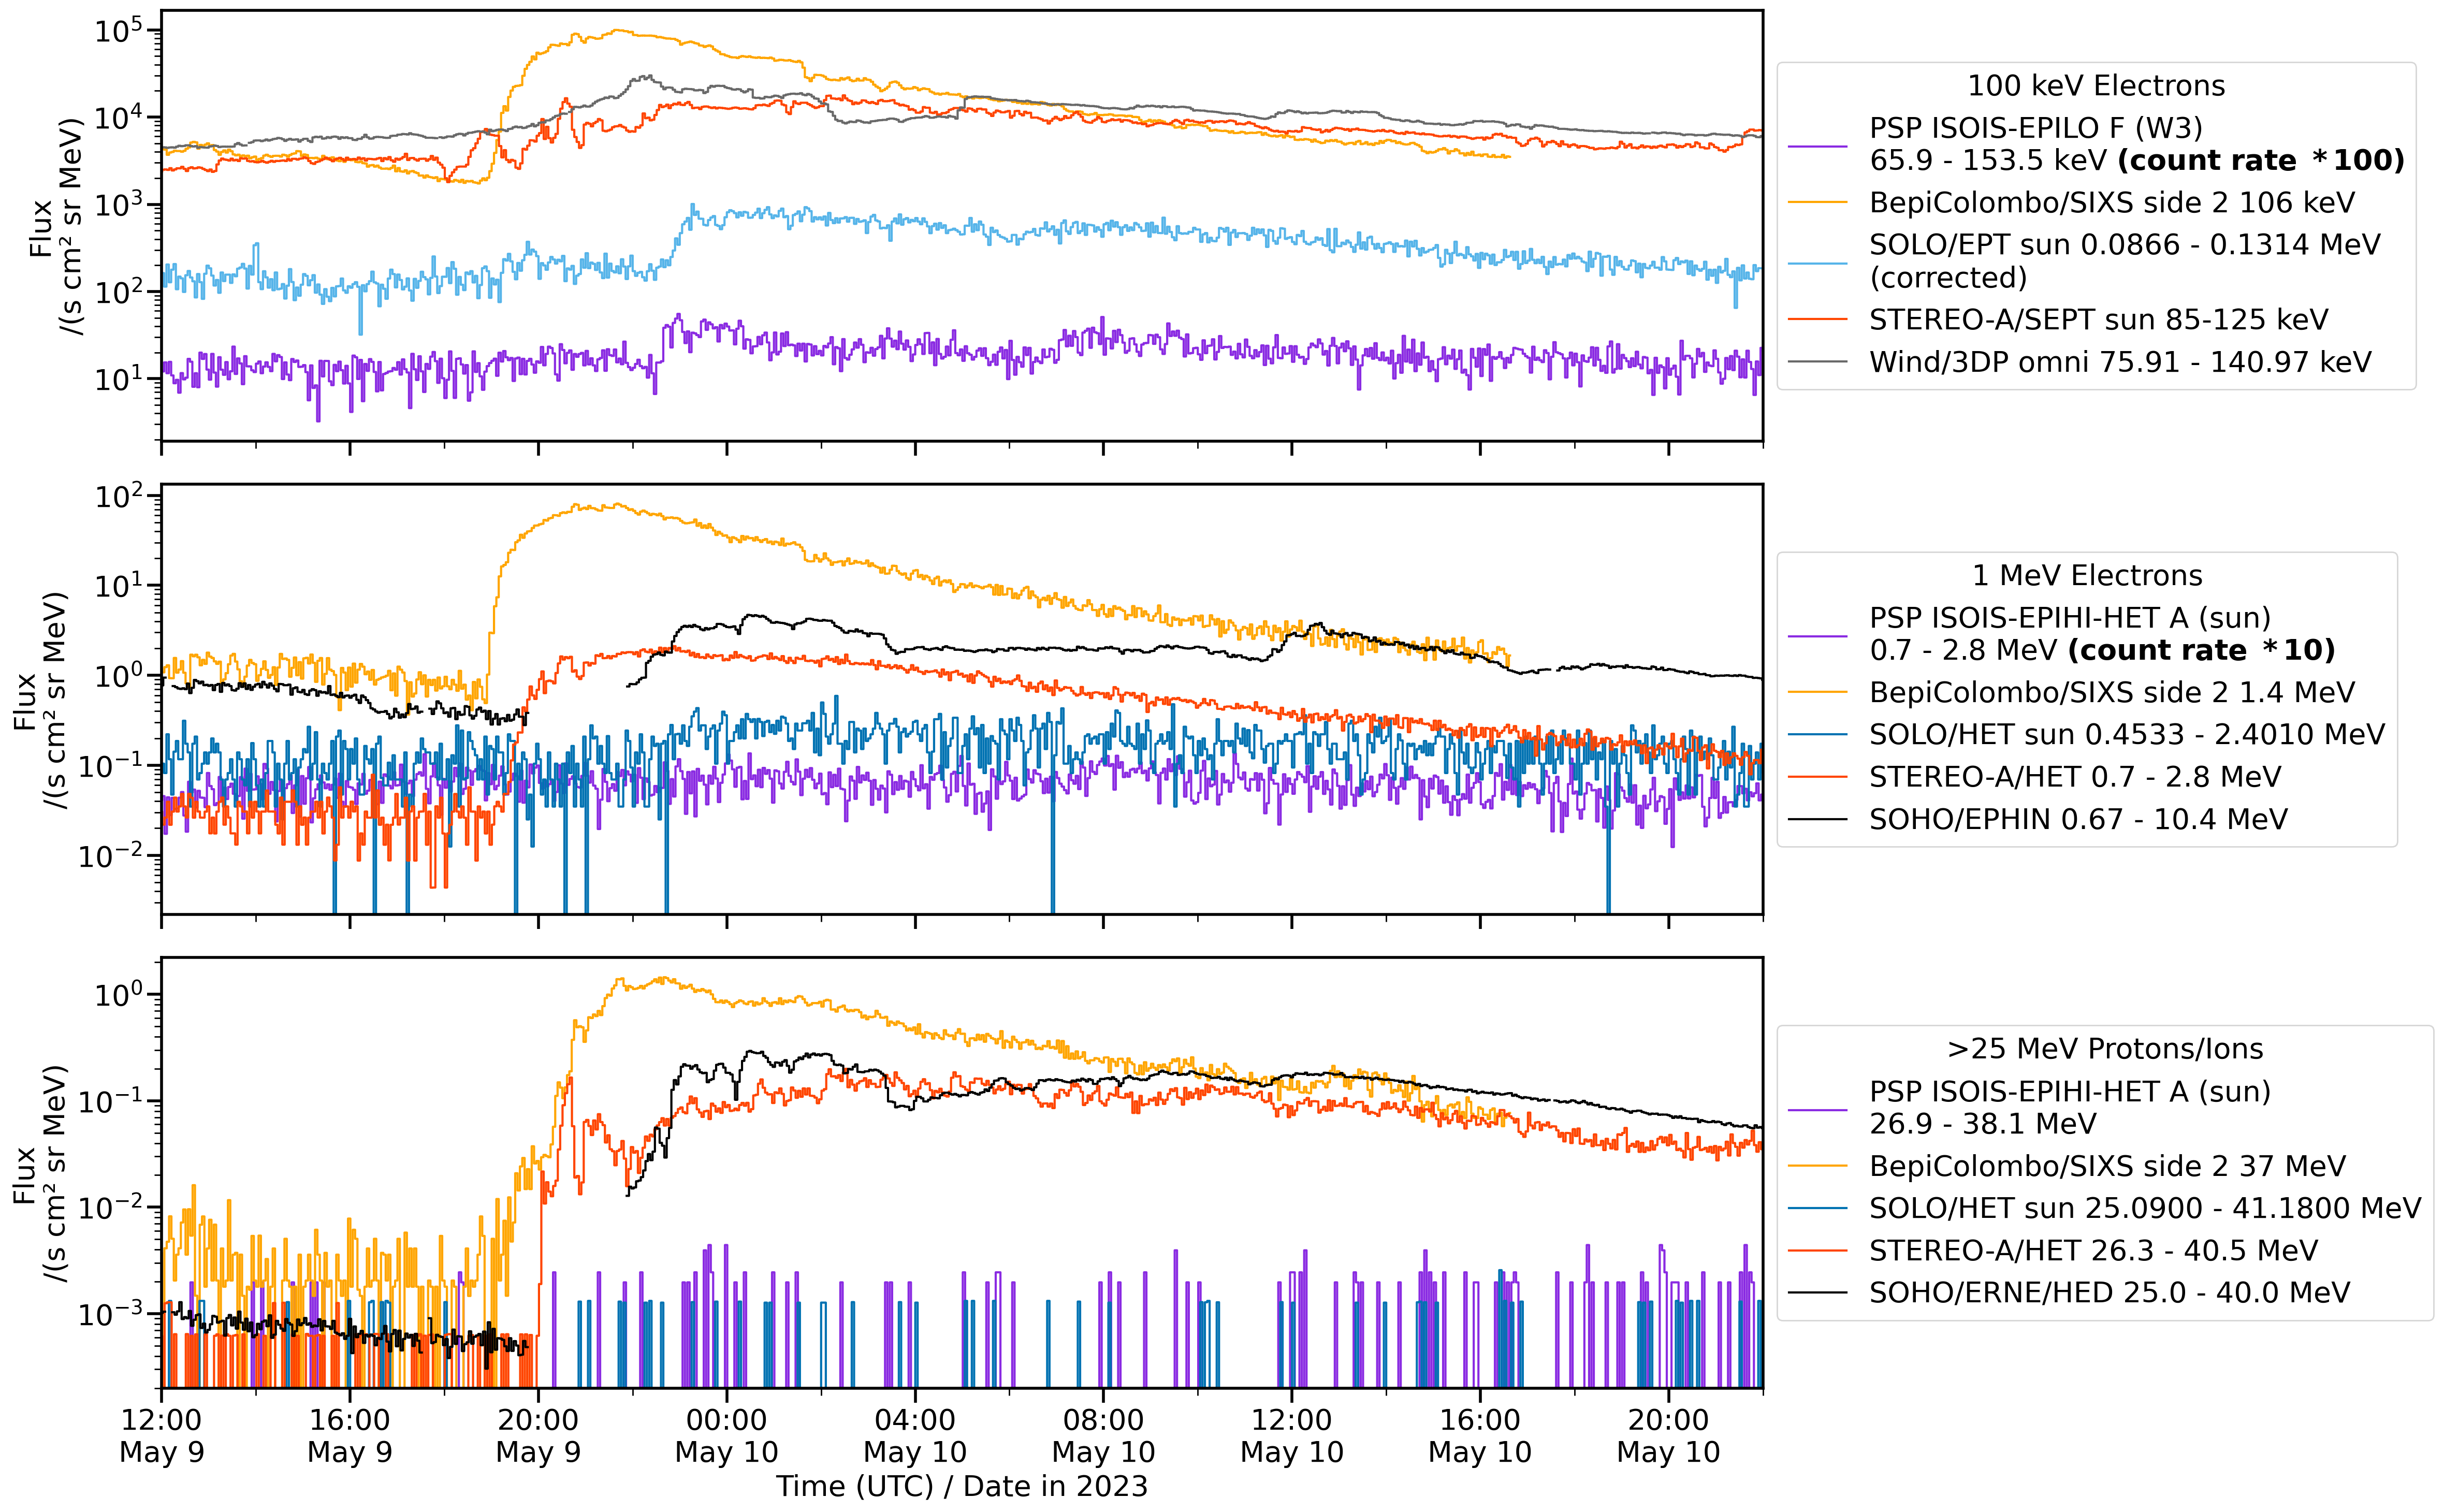

In [10]:
# from code3 import *
# fig3, axes3 = make_plot(startdate, enddate, averaging='3min')

## Obtain SolarMACH plot

In [12]:
from solarmach import SolarMACH

No solar wind speeds defined, trying to obtain measurements...


/Users/jagies/miniforge3/envs/serpentine/lib/python3.12/site-packages/speasy/core/data_containers.py:17: UserWarning: no explicit representation of timezones available for np.datetime64
  return np.searchsorted(time, np.datetime64(key, 'ns'), side='left')


No Vsw data found for 'Solar Orbiter' on 2023-05-09 12:00:00, assuming default Vsw value of 400.0 km/s.


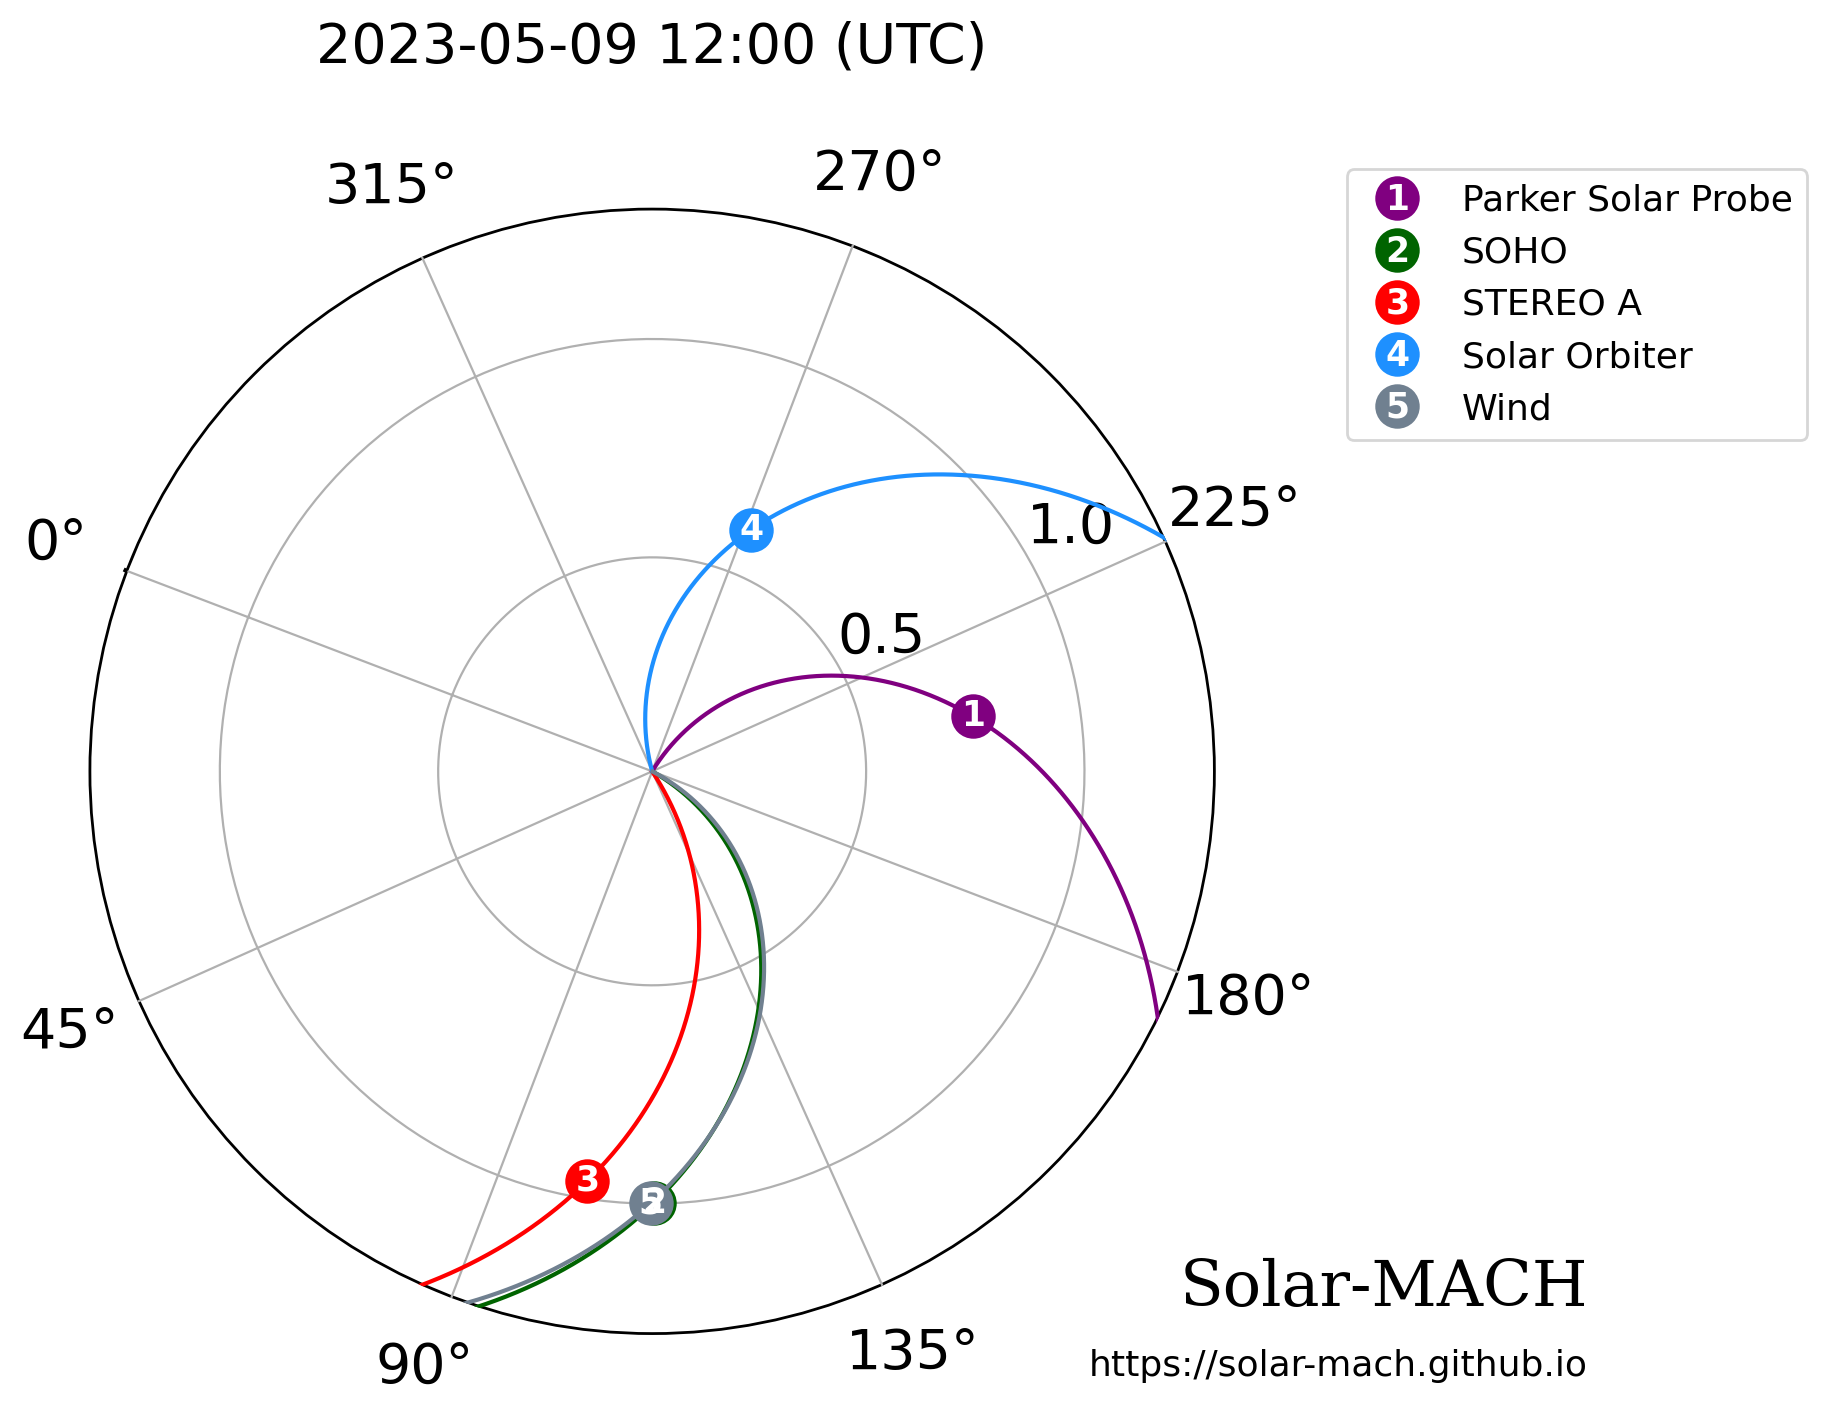

In [13]:
# make figure for startdate defined above, or define separely
date = startdate  # startdate or or date = dt.datetime(2023, 5, 10, 18, 50) or date = '2023-05-10 18:50:00'

# Define position-sensitive solar wind speed per spacecraft, e.g., vsw_list = [400, 400, 400, 400, 400, 400, 400]
# or leave empty to let solarmach try to automatically obtain measured solar wind speeds from each spacecraft
vsw_list = []

# initialize
sm = SolarMACH(date, E.spacecraft, vsw_list, coord_sys='Carrington')

# make plot
sm.plot(markers='numbers')

In [14]:
# obtain data as Pandas DataFrame
display(sm.coord_table)

Spacecraft/Body  Carrington longitude (°)  Carrington latitude (°)  \
0  Parker Solar Probe                210.626438                 3.692653   
1                SOHO                111.142966                -3.313011   
2            STEREO-A                101.901778                -4.291314   
3       Solar Orbiter                268.592555                 7.892384   
4                WIND                110.689465                -3.371420   

   Heliocentric distance (AU)  Longitudinal separation to Earth's longitude  \
0                    0.756182                                     99.740589   
1                    0.999957                                      0.257117   
2                    0.962116                                     -8.984071   
3                    0.613877                                    157.706707   
4                    1.000656                                     -0.196384   

   Latitudinal separation to Earth's latitude         Vsw  \
0                                    7.027815  381.665303   
1                                    0.022151  412.800000   
2                                   -0.956152  561.423077   
3                                   11.227546  400.000000   
4                                   -0.036258  395.743538   

   Magnetic footpoint longitude (Carrington)  
0                                 259.919370  
1                                 171.535476  
2                                 144.551073  
3                                 306.327280  
4                                 173.723905